In [4]:
# IMDB 영화리뷰 감성분석

# 처리해야 할 문장을 파이썬 리스트에 옮겨 담았습니다.
sentences=['i feel hungry', 'i eat lunch', 'now i feel happy']

# 파이썬 split() 메소드를 이용해 단어 단위로 문장을 쪼개 봅니다.
word_list = 'i feel hungry'.split()
print(word_list)


index_to_word={}  # 빈 딕셔너리를 만들어서

# 단어들을 하나씩 채워 봅니다. 채우는 순서는 일단 임의로 하였습니다. 그러나 사실 순서는 중요하지 않습니다. 
# <BOS>, <PAD>, <UNK>는 관례적으로 딕셔너리 맨 앞에 넣어줍니다. 
index_to_word[0]='<PAD>'  # 패딩용 단어
index_to_word[1]='<BOS>'  # 문장의 시작지점
index_to_word[2]='<UNK>'  # 사전에 없는(Unknown) 단어
index_to_word[3]='i'
index_to_word[4]='feel'
index_to_word[5]='hungry'
index_to_word[6]='eat'
index_to_word[7]='lunch'
index_to_word[8]='now'
index_to_word[9]='happy'

print(index_to_word)


word_to_index={word:index for index, word in index_to_word.items()}
print(word_to_index)


# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트로 변환해 주는 함수를 만들어 봅시다.
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

print(get_encoded_sentence('i eat lunch', word_to_index))



# 여러 개의 문장 리스트를 한꺼번에 숫자 텐서로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# sentences=['i feel hungry', 'i eat lunch', 'now i feel happy'] 가 아래와 같이 변환됩니다. 
encoded_sentences = get_encoded_sentences(sentences, word_to_index)
print(encoded_sentences)


# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

print(get_decoded_sentence([1, 3, 4, 5], index_to_word))



# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# encoded_sentences=[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]] 가 아래와 같이 변환됩니다.
print(get_decoded_sentences(encoded_sentences, index_to_word))


['i', 'feel', 'hungry']
{0: '<PAD>', 1: '<BOS>', 2: '<UNK>', 3: 'i', 4: 'feel', 5: 'hungry', 6: 'eat', 7: 'lunch', 8: 'now', 9: 'happy'}
{'<PAD>': 0, '<BOS>': 1, '<UNK>': 2, 'i': 3, 'feel': 4, 'hungry': 5, 'eat': 6, 'lunch': 7, 'now': 8, 'happy': 9}
[1, 3, 6, 7]
[[1, 3, 4, 5], [1, 3, 6, 7], [1, 8, 3, 4, 9]]
i feel hungry
['i feel hungry', 'i eat lunch', 'now i feel happy']


In [5]:
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    raw_inputs, value=word_to_index["<PAD>"], padding="post", maxlen=5
)
print(raw_inputs)


NameError: name 'tf' is not defined

In [6]:
import numpy as np
import tensorflow as tf
import os

vocab_size = len(word_to_index)  # 위 예시에서 딕셔너리에 포함된 단어 개수는 10
word_vector_dim = 4  # 그림과 같이 4차원의 워드 벡터를 가정합니다.

embedding = tf.keras.layers.Embedding(
    input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True
)

# tf.keras.preprocessing.sequence.pad_sequences를 통해 word vector를 모두 일정 길이로 맞춰주어야
# embedding 레이어의 input이 될 수 있음에 주의해 주세요.
raw_inputs = np.array(get_encoded_sentences(sentences, word_to_index), dtype=object)
raw_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    raw_inputs, value=word_to_index["<PAD>"], padding="post", maxlen=5
)
output = embedding(raw_inputs)
print(output)


tf.Tensor(
[[[-0.03559189 -0.02428514  0.02651611 -0.02007428]
  [ 0.00980557  0.04505447 -0.02479839 -0.02560682]
  [ 0.00769741 -0.04591529 -0.01040787 -0.00733227]
  [-0.0031529   0.02617589  0.00394589 -0.01485797]
  [-0.01298193  0.02921568  0.00449332  0.00313439]]

 [[-0.03559189 -0.02428514  0.02651611 -0.02007428]
  [ 0.00980557  0.04505447 -0.02479839 -0.02560682]
  [ 0.03056686 -0.04687606  0.02332662  0.02599962]
  [ 0.04954163 -0.03928299  0.01358142  0.02587133]
  [-0.01298193  0.02921568  0.00449332  0.00313439]]

 [[-0.03559189 -0.02428514  0.02651611 -0.02007428]
  [-0.01256493  0.04775606 -0.01409938 -0.0147107 ]
  [ 0.00980557  0.04505447 -0.02479839 -0.02560682]
  [ 0.00769741 -0.04591529 -0.01040787 -0.00733227]
  [ 0.01464022 -0.00263842  0.04551599  0.01502347]]], shape=(3, 5, 4), dtype=float32)


In [49]:
# 그러면 RNN 모델을 사용하여 이전 스텝의 텍스트 데이터를 처리하는 예제 코드를 구현해 보겠습니다.
vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()










Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 416       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 537
Trainable params: 537
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 1D CNN으로 사용하는 방법

vocab_size = 10  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 4  # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다.

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(16, 7, activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation="relu"))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation="relu"))
# 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 4)           40        
_________________________________________________________________
conv1d (Conv1D)              (None, None, 16)          464       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 16)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

### (1) IMDB 데이터셋 분석

In [16]:
imdb = tf.keras.datasets.imdb

# IMDb 데이터셋 다운로드 
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
print(f"훈련 샘플 개수: {len(x_train)}, 테스트 개수: {len(x_test)}")




print(x_train[0])  # 1번째 리뷰데이터
print('라벨: ', y_train[0])  # 1번째 리뷰데이터의 라벨
print('1번째 리뷰 문장 길이: ', len(x_train[0]))
print('2번째 리뷰 문장 길이: ', len(x_train[1]))


word_to_index = imdb.get_word_index()
index_to_word = {index:word for word, index in word_to_index.items()}
print(index_to_word[1])     # 'the' 가 출력됩니다. 
print(word_to_index['the'])  # 1 이 출력됩니다.


훈련 샘플 개수: 25000, 테스트 개수: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
라벨:  1
1번째 리뷰 문장 길이:  218
2번째

In [17]:
# 보정이 필요함




# 보정 전 x_train[0] 데이터
print(get_decoded_sentence(x_train[0], index_to_word))



#실제 인코딩 인덱스는 제공된 word_to_index에서 index 기준으로 3씩 뒤로 밀려 있습니다.  
word_to_index = {k:(v+3) for k,v in word_to_index.items()}

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다.
word_to_index["<PAD>"] = 0
word_to_index["<BOS>"] = 1
word_to_index["<UNK>"] = 2  # unknown
word_to_index["<UNUSED>"] = 3

index_to_word = {index:word for word, index in word_to_index.items()}

print(index_to_word[1])     # '<BOS>' 가 출력됩니다. 
print(word_to_index['the'])  # 4 이 출력됩니다. 
print(index_to_word[4])     # 'the' 가 출력됩니다.

# 보정 후 x_train[0] 데이터
print(get_decoded_sentence(x_train[0], index_to_word))


print(get_decoded_sentence(x_train[0], index_to_word))
print('라벨:', y_train[0])  # 1번째 리뷰데이터의 라벨


as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have two of

In [19]:
# pad_sequences를 통해 데이터셋 상의 문장의 길이를 통일하는 것을 잊어서는 안됩니다.
# 문장 최대 길이 maxlen의 값 설정도 전체 모델 성능에 영향을 미치게 됩니다.
# 이 길이도 적절한 값을 찾기 위해서는 전체 데이터셋의 분포를 확인해 보는 것이 좋습니다.

total_data_text = list(x_train) + list(x_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다. 
print('문장길이 평균 : ', np.mean(num_tokens))
print('문장길이 최대 : ', np.max(num_tokens))
print('문장길이 표준편차 : ', np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,  
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print('pad_sequences maxlen : ', maxlen)
print(f'전체 문장의 {np.sum(num_tokens < max_tokens) / len(num_tokens)}%가 maxlen 설정값 이내에 포함됩니다. ')


문장길이 평균 :  234.75892
문장길이 최대 :  2494
문장길이 표준편차 :  172.91149458735703
pad_sequences maxlen :  580
전체 문장의 0.94536%가 maxlen 설정값 이내에 포함됩니다. 


In [20]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_to_index["<PAD>"],
                                                        padding='pre', # 'post' 혹은 'pre'
                                                        maxlen=maxlen)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_to_index["<PAD>"],
                                                       padding='pre', # 'post' 혹은 'pre'
                                                       maxlen=maxlen)

print(x_train.shape)


(25000, 580)


### (2) 딥러닝 모델 설계와 훈련

In [51]:
vocab_size = 10000  # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 16  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

# model 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.


model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model2.add(tf.keras.layers.Conv1D(16, 7, activation="relu"))
model2.add(tf.keras.layers.MaxPooling1D(5))
model2.add(tf.keras.layers.Conv1D(16, 7, activation="relu"))
model2.add(tf.keras.layers.GlobalMaxPooling1D())
model2.add(tf.keras.layers.Dense(8, activation="relu"))
# 최종 출력은 긍정/부정을 나타내는 1dim 입니다.
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model2.summary()

model = model2


# # LSTM 이용한것

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model.summary()






Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 16)          160000    
_________________________________________________________________
conv1d_12 (Conv1D)           (None, None, 16)          1808      
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, None, 16)          1808      
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 1)               

In [52]:
# model 훈련 전에, 훈련용 데이터셋 25000건 중 xxxx건을 분리하여 검증셋(validation set)으로 사용하도록 합니다.
#적절한 validation 데이터는 몇 개가 좋을지 고민해 봅시다.


# validation set 분리
x_val = x_train[:10000]   
y_val = y_train[:10000]

# validation set을 제외한 나머지 건
partial_x_train = x_train[10000:]  
partial_y_train = y_train[10000:]

print(partial_x_train.shape)
print(partial_y_train.shape)


(15000, 580)
(15000,)


In [53]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

epochs = 20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다.

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=epochs,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=2,
)


results = model.evaluate(x_test,  y_test, verbose=2)

print(results)



Epoch 1/20
469/469 - 10s - loss: 0.4753 - accuracy: 0.7807 - val_loss: 0.4252 - val_accuracy: 0.8181
Epoch 2/20
469/469 - 8s - loss: 0.2759 - accuracy: 0.8942 - val_loss: 0.3284 - val_accuracy: 0.8680
Epoch 3/20
469/469 - 8s - loss: 0.1965 - accuracy: 0.9299 - val_loss: 0.3579 - val_accuracy: 0.8574
Epoch 4/20
469/469 - 8s - loss: 0.1479 - accuracy: 0.9509 - val_loss: 0.3782 - val_accuracy: 0.8618
Epoch 5/20
469/469 - 8s - loss: 0.1163 - accuracy: 0.9621 - val_loss: 0.4059 - val_accuracy: 0.8580
Epoch 6/20
469/469 - 9s - loss: 0.0861 - accuracy: 0.9733 - val_loss: 0.4561 - val_accuracy: 0.8623
Epoch 7/20
469/469 - 8s - loss: 0.0728 - accuracy: 0.9784 - val_loss: 0.5261 - val_accuracy: 0.8298
Epoch 8/20
469/469 - 8s - loss: 0.0702 - accuracy: 0.9772 - val_loss: 0.5473 - val_accuracy: 0.8585
Epoch 9/20
469/469 - 8s - loss: 0.0486 - accuracy: 0.9850 - val_loss: 0.5894 - val_accuracy: 0.8565
Epoch 10/20
469/469 - 8s - loss: 0.0462 - accuracy: 0.9868 - val_loss: 0.5659 - val_accuracy: 0.843

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


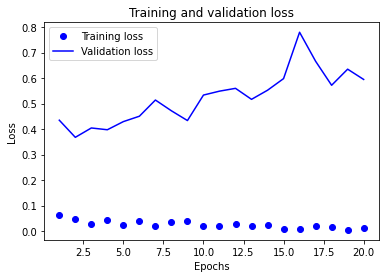

In [33]:
history_dict = history.history
print(history_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들




import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [34]:
results = model.evaluate(x_test,  y_test, verbose=2)

print(results)


782/782 - 5s - loss: 0.9116 - accuracy: 0.8395
[0.9115828275680542, 0.8394799828529358]


### (3) Word2Vec의 적용

In [35]:
# word2vec https://www.youtube.com/watch?v=sY4YyacSsLc&t=126s

embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)


(10000, 16)


In [39]:
# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/word2vec.txt'
f = open(word2vec_file_path, 'w')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()




from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['computer']
vector






array([-0.02869857, -0.03174621, -0.07889337,  0.03656708,  0.06022773,
       -0.0224788 , -0.05140129, -0.04104274,  0.05922911,  0.06714567,
       -0.02659363,  0.08584996,  0.08863145, -0.09454675, -0.00263611,
       -0.00586801], dtype=float32)

In [41]:
word_vectors.similar_by_word("love")


[('entered', 0.9845802187919617),
 ('suitable', 0.9826969504356384),
 ('psychologist', 0.9826353192329407),
 ('bloodshed', 0.9813269376754761),
 ("audience's", 0.9811145067214966),
 ('spot', 0.9811102151870728),
 ('rap', 0.98016357421875),
 ('recall', 0.9799236059188843),
 ('captured', 0.9794089198112488),
 ('deranged', 0.9793370962142944)]

In [ ]:
# 한국어 임베딩
# https://ratsgo.github.io/natural%20language%20processing/2019/09/12/embedding/


In [44]:
from gensim.models import KeyedVectors

word2vec_path = os.getenv('HOME')+'/aiffel/sentiment_classification/data/GoogleNews-vectors-negative300.bin.gz'
word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
vector = word2vec['computer']
vector     # 무려 300dim의 워드 벡터입니다.


array([ 1.07421875e-01, -2.01171875e-01,  1.23046875e-01,  2.11914062e-01,
       -9.13085938e-02,  2.16796875e-01, -1.31835938e-01,  8.30078125e-02,
        2.02148438e-01,  4.78515625e-02,  3.66210938e-02, -2.45361328e-02,
        2.39257812e-02, -1.60156250e-01, -2.61230469e-02,  9.71679688e-02,
       -6.34765625e-02,  1.84570312e-01,  1.70898438e-01, -1.63085938e-01,
       -1.09375000e-01,  1.49414062e-01, -4.65393066e-04,  9.61914062e-02,
        1.68945312e-01,  2.60925293e-03,  8.93554688e-02,  6.49414062e-02,
        3.56445312e-02, -6.93359375e-02, -1.46484375e-01, -1.21093750e-01,
       -2.27539062e-01,  2.45361328e-02, -1.24511719e-01, -3.18359375e-01,
       -2.20703125e-01,  1.30859375e-01,  3.66210938e-02, -3.63769531e-02,
       -1.13281250e-01,  1.95312500e-01,  9.76562500e-02,  1.26953125e-01,
        6.59179688e-02,  6.93359375e-02,  1.02539062e-02,  1.75781250e-01,
       -1.68945312e-01,  1.21307373e-03, -2.98828125e-01, -1.15234375e-01,
        5.66406250e-02, -

In [45]:
word2vec.similar_by_word("love")


[('loved', 0.6907791495323181),
 ('adore', 0.6816873550415039),
 ('loves', 0.661863386631012),
 ('passion', 0.6100708842277527),
 ('hate', 0.600395679473877),
 ('loving', 0.5886635780334473),
 ('affection', 0.5664337873458862),
 ('undying_love', 0.5547304749488831),
 ('absolutely_adore', 0.5536840558052063),
 ('adores', 0.5440906882286072)]

In [46]:
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원수
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in word2vec:
        embedding_matrix[i] = word2vec[index_to_word[i]]


In [47]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 300  # 워드 벡터의 차원 수 

# 모델 구성
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 
                                 word_vector_dim, 
                                 embeddings_initializer=Constant(embedding_matrix),  # 카피한 임베딩을 여기서 활용
                                 input_length=maxlen, 
                                 trainable=True))   # trainable을 True로 주면 Fine-tuning
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(16, 7, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 580, 300)          3000000   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 574, 16)           33616     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 114, 16)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 108, 16)           1808      
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [54]:
# 학습의 진행
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

epochs = 20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다.

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1,
)


# 테스트셋을 통한 모델 평가
results = model.evaluate(x_test, y_test, verbose=2)

print(results)


Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.8678 - val_accuracy: 0.8551
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.8973 - val_accuracy: 0.8563
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.9206 - val_accuracy: 0.8559
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 0.9489 - val_accuracy: 0.8558
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.9623 - val_accuracy: 0.8551
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0015 - accuracy: 0.9998 - val_loss: 0.9816 - val_accuracy: 0.8544
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0013 - accuracy: 0.9999 - val_loss: 1.0064 - val_accuracy: 0.8545
Epoch 8/20
30

# 네이버 영화리뷰 감성분석 도전하기

In [1]:
import pandas
import konlpy
import gensim

print(pandas.__version__)
print(konlpy.__version__)
print(gensim.__version__)


import pandas as pd

# 데이터를 읽어봅시다. 
train_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_train.txt')
test_data = pd.read_table('~/aiffel/sentiment_classification/data/ratings_test.txt')

train_data.head()



1.3.3
0.5.2
4.1.2


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [20]:
from konlpy.tag import Mecab
import numpy as np
from collections import Counter
import pandas as pd

from konlpy.tag import Mecab
import numpy as np
from collections import Counter

import tensorflow as tf
import os

import matplotlib.pyplot as plt


tokenizer = Mecab()
stopwords = [
    "의",
    "가",
    "이",
    "은",
    "들",
    "는",
    "좀",
    "잘",
    "걍",
    "과",
    "도",
    "를",
    "으로",
    "자",
    "에",
    "와",
    "한",
    "하다",
]


def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=["document"], inplace=True)  # 데이터 중복 제거
    train_data = train_data.dropna(how="any")  # NaN 결측치 제거
    test_data.drop_duplicates(subset=["document"], inplace=True)  # 데이터 중복 제거
    test_data = test_data.dropna(how="any")  # NaN 결측치 제거

    X_train = []  # 학습용 데이터
    for sentence in train_data["document"]:
        temp_X = tokenizer.morphs(sentence)  # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거
        X_train.append(temp_X)  # 단어 저장

    X_test = []  # 테스트용 데이터
    for sentence in test_data["document"]:
        temp_X = tokenizer.morphs(sentence)  # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거
        X_test.append(temp_X)  # 단어 저장

    words = np.concatenate(X_train).tolist()  # array 합치고 list로 변환
    counter = Counter(
        words
    )  # list의 요소 개수 세기 => 딕셔너리 {단어: 개수} 형태로 반환
    counter = counter.most_common(
        10000 - 4
    )  # 최빈값 (10000-4)개 => 가장 마지막 4개를 제외한 나머지
    vocab = ["<PAD>", "<BOS>", "<UNK>", "<UNUSED>"] + [
        key for key, _ in counter
    ]  # 단어 저장 list # <PAD>, <BOS>, <UNK>, <UNUSED>
    word_to_index = {
        word: index for index, word in enumerate(vocab)
    }  # 딕셔너리 {단어: 인덱스} 형태

    # 중첩 함수
    def wordlist_to_indexlist(wordlist):
        return [
            word_to_index[word] if word in word_to_index else word_to_index["<UNK>"]
            for word in wordlist
        ]

    # list(map(함수, 리스트)): 리스트의 모든 요소를 지정된 함수로 처리한 결과를 리스트로 만듦
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))

    return (
        X_train,
        np.array(list(train_data["label"])),
        X_test,
        np.array(list(test_data["label"])),
        word_to_index,
    )


X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)


In [21]:
index_to_word = {index:word for word, index in word_to_index.items()}


In [22]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]


In [26]:
# 3) 모델 구성을 위한 데이터 분석 및 가공
# 데이터셋 내 문장 길이 분포
# 적절한 최대 문장 길이 지정
# keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

print(X_train[0])  # 1번째 리뷰데이터
print("라벨: ", y_train[0])  # 1번째 리뷰데이터의 라벨

print("1번째 리뷰 문장 길이: ", len(X_train[0]))
print("2번째 리뷰 문장 길이: ", len(X_train[1]))


total_data_text = list(X_train) + list(X_test)
# 텍스트데이터 문장길이의 리스트를 생성한 후
num_tokens = [len(tokens) for tokens in total_data_text]
num_tokens = np.array(num_tokens)
# 문장길이의 평균값, 최대값, 표준편차를 계산해 본다.
print("문장길이 평균 : ", np.mean(num_tokens))
print("문장길이 최대 : ", np.max(num_tokens))
print("문장길이 표준편차 : ", np.std(num_tokens))

# 예를들어, 최대 길이를 (평균 + 2*표준편차)로 한다면,
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
maxlen = int(max_tokens)
print("pad_sequences maxlen : ", maxlen)
print(
    "전체 문장의 {}%가 maxlen 설정값 이내에 포함됩니다. ".format(
        np.sum(num_tokens < max_tokens) / len(num_tokens)
    )
)


# keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가


X_train = tf.keras.preprocessing.sequence.pad_sequences(
    X_train, value=word_to_index["<PAD>"], padding="pre", maxlen=maxlen  # 혹은 'post'
)

X_test = tf.keras.preprocessing.sequence.pad_sequences(
    X_test, value=word_to_index["<PAD>"], padding="pre", maxlen=maxlen  # 혹은 'post'
)

print(X_train.shape)  # (146182, 41)
print(X_test.shape)  # (49157, 41)


# 4) 모델 구성 및 validation set 구성

vocab_size = len(word_to_index)  # 어휘 사전의 크기: 10000개 단어
word_vector_dim = 200  # 단어 하나를 표현하는 임베딩 벡터의 차원 수입니다. (변경 가능한 하이퍼 파라미터)


# 모델 1: RNN

model_lstm = tf.keras.Sequential()
model_lstm.add(
    tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,))
)
model_lstm.add(
    tf.keras.layers.LSTM(8)
)  # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model_lstm.add(tf.keras.layers.Dense(8, activation="relu"))
model_lstm.add(
    tf.keras.layers.Dense(1, activation="sigmoid")
)  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.


# 모델 2: 1-D CNN

model_1d_cnn = tf.keras.Sequential()
model_1d_cnn.add(
    tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,))
)
model_1d_cnn.add(tf.keras.layers.Conv1D(16, 7, activation="relu"))
model_1d_cnn.add(tf.keras.layers.MaxPooling1D(5))
model_1d_cnn.add(tf.keras.layers.Conv1D(16, 7, activation="relu"))
model_1d_cnn.add(tf.keras.layers.GlobalMaxPooling1D())
model_1d_cnn.add(tf.keras.layers.Dense(8, activation="relu"))
model_1d_cnn.add(
    tf.keras.layers.Dense(1, activation="sigmoid")
)  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_1d_cnn.summary()


# 모델 3: GlobalMaxPooling1D() 레이어 1개만 사용

model_gmp1d = tf.keras.Sequential()
model_gmp1d.add(
    tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,))
)
model_gmp1d.add(tf.keras.layers.GlobalMaxPooling1D())
model_gmp1d.add(tf.keras.layers.Dense(8, activation="relu"))
model_gmp1d.add(
    tf.keras.layers.Dense(1, activation="sigmoid")
)  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_gmp1d.summary()


# 5) 모델 훈련 개시

# Train : Validation : Test 을 일반적으로 6 : 2 : 2로 이용

# 일반적으로 전체 데이터 중 80%를 학습으로, 20%를 검증으로 사용하는 것이 좋다고 한다.
# validation set (총 데이터 개수 * 0.2)건 분리
x_val_len = int(len(X_train) * 0.2)
y_val_len = int(len(y_train) * 0.2)

x_val = X_train[:x_val_len]
y_val = y_train[:y_val_len]

print(x_val.shape)  # (29236, 41)
print(y_val.shape)  # (29236,)

# validation set을 제외한 나머지 (총 데이터 개수 * 0.8)건
partial_x_train = X_train[x_val_len:]
partial_y_train = y_train[y_val_len:]

print(partial_x_train.shape)  # (116946, 41)
print(partial_y_train.shape)  # (116946,)


# 모델 1
model_lstm.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

epochs = 20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다.

history_lstm = model_lstm.fit(
    partial_x_train,
    partial_y_train,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1,
    callbacks=[],
)


# 모델 2
model_1d_cnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

epochs = 20 # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다.

history_1d_cnn = model_1d_cnn.fit(
    partial_x_train,
    partial_y_train,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1,
    callbacks=[],
)

# 모델 3
model_gmp1d.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

epochs = 20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다.

history_gmp1d = model_gmp1d.fit(
    partial_x_train,
    partial_y_train,
    epochs=epochs,
    batch_size=512,
    validation_data=(x_val, y_val),
    verbose=1,
    callbacks=[],
)




[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  32  74 919   4   4
  39 228  20  33 748]
라벨:  0
1번째 리뷰 문장 길이:  41
2번째 리뷰 문장 길이:  41
문장길이 평균 :  41.0
문장길이 최대 :  41
문장길이 표준편차 :  0.0
pad_sequences maxlen :  41
전체 문장의 0.0%가 maxlen 설정값 이내에 포함됩니다. 
(146182, 41)
(49157, 41)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 200)         2000000   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 16)          22416     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 16)          1808      
______________________________________

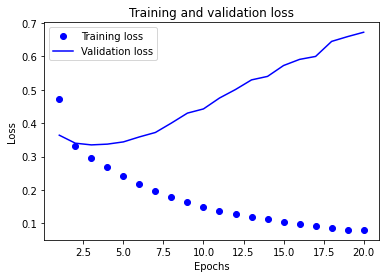

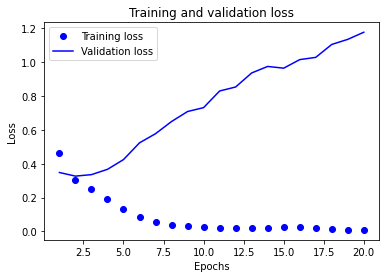

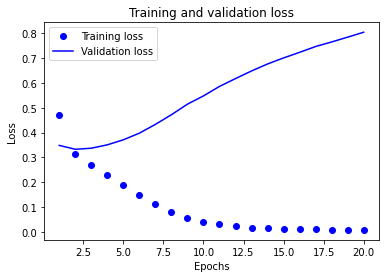

In [29]:
# 6) Loss, Accuracy 그래프 시각화

import matplotlib.pyplot as plt


epochs = range(1, len(acc) + 1)


def draw_graph(history_dict):
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']


    # "bo"는 "파란색 점"입니다
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b는 "파란 실선"입니다
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# 모델 1
draw_graph(history_lstm.history)
# 모델 2
draw_graph(history_1d_cnn.history)
# 모델 3
draw_graph(history_gmp1d.history)


In [36]:
# 7) 학습된 Embedding 레이어 분석

embedding_layer = model_lstm.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim)

# 학습한 Embedding 파라미터를 파일에 써서 저장합니다. 
word2vec_file_path = '../data/word2vec_LSTM.txt'

f = open(word2vec_file_path, 'w+')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))  # 몇개의 벡터를 얼마 사이즈로 기재할지 타이틀을 씁니다.

# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록합니다. 
vectors = model_lstm.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

# gensim에서 제공하는 패키지를 이용해, 위에 남긴 임베딩 파라미터를 읽어서 word vector로 활용
word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['재미']
vector


(10000, 200)


FileNotFoundError: [Errno 2] No such file or directory: '../data/word2vec_LSTM.txt'

In [ ]:
# 회고
RNN을 1D conv로 구현할 수 있다는 것을 알게됨
한국어 Word2Vec 임베딩 활용하여 성능 개선을 마무리하지 못함
validation data에 대해 4에폭에서 일반화성능이 떨어지기 시작함. early stopping을 쓸 수 있을 것 같음.
